# Logistic Regression

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from decimal import *

In [47]:
getcontext().prec = 100

In [50]:
weight = np.random.normal(2, 1.5, (20,))
weight = np.append(weight, np.random.normal(8, 1.5, (20,)))

is_obese = []
for i in range(len(weight)):
    if i < len(weight)/2:
        is_obese.append(0)
    else:
        is_obese.append(1)

print(weight)
print(is_obese)

[ 3.02561391  1.30818445  2.1925219   2.51702688 -0.27445749  2.95803726
  2.96746039  0.3148752   4.07254762  1.41656536  2.97883284  2.75777438
  2.3552026   2.21126899 -1.97443077  3.19082282  1.52930998  2.37188789
  2.17425585  2.292442    7.82712825  6.89313803  7.58920848  6.15918187
  5.55658806  6.60246105  9.7137077   8.09093708  5.87576313  9.17264359
  9.87623667  9.81433329  5.32236132  5.59412762  7.64157187  6.4250623
  8.62748162  8.36059198  9.06110539  7.61092191]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [74]:
def sigmoid(x, b0=1, b1=1):
    value = 1/(1+np.exp(-(b0+b1*x)))

    return value

1.0


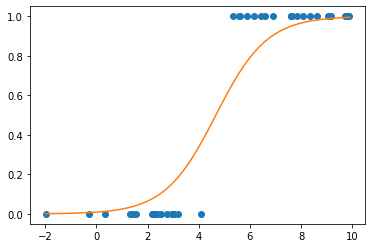

In [82]:
plt.plot(weight, is_obese, 'o')

# plt.plot(np.sort(weight), np.sort(sigmoid(np.array(weight), -20, 5)))

sigmoid_x = np.arange(-2,10,0.1)
plt.plot(sigmoid_x, sigmoid(sigmoid_x, -4.67, 1))
print(sigmoid(50))

In [91]:
def loss_function(label, predicted):
    loss = 0

    for l in label:
        for p in predicted:

            # ????
            if p == 1: p = 0.999999999999999

            loss += -l * math.log(p)-(1-l) * math.log(1-p)

    return loss

In [70]:
loss_value = loss_function(is_obese, sigmoid(weight, -5, 1))
print(loss_value)

2415.4435480980746


In [94]:
first_step=True
B0 = 0
B1 = 0
for b0 in np.linspace(-5, -1, 100):
    for b1 in np.linspace(1, 50, 100):
        if first_step:
            min_value = loss_function(is_obese, sigmoid(weight, b0, b1))
            first_step=False
            
        current_loss = loss_function(is_obese, sigmoid(weight, b0, b1))

        if current_loss < min_value:
            min_value = current_loss
            B0 = b0
            B1 = b1

print(f'{min_value=}, {B0=}, {B1=}')

min_value=2408.5849976535733, B0=-4.6767676767676765, B1=1.0


1.0


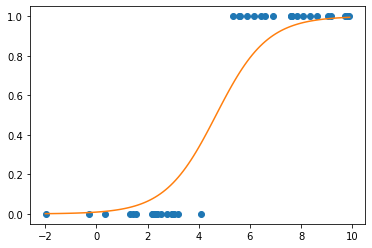

In [95]:
plt.plot(weight, is_obese, 'o')

# plt.plot(np.sort(weight), np.sort(sigmoid(np.array(weight), -20, 5)))

sigmoid_x = np.arange(-2,10,0.1)
plt.plot(sigmoid_x, sigmoid(sigmoid_x, B0, B1))
print(sigmoid(50))